# Q&A

### Pandas `Melt` vs `Unmelt`

In [1]:
import pandas as pd
import numpy as np
technologies= ({
    'Courses':["Spark","PySpark","Hadoop","Pandas"],
    'Fee': [22000,25000,30000,35000],
    'Duration':['30days','50days','40days','35days'],
    'Discount':[1000,2000,2500,1500]
              })
df = pd.DataFrame(technologies)
print(df)

   Courses    Fee Duration  Discount
0    Spark  22000   30days      1000
1  PySpark  25000   50days      2000
2   Hadoop  30000   40days      2500
3   Pandas  35000   35days      1500


#### `pd.melt()`

In [2]:
df_melted = pd.melt(df,id_vars=['Courses'], value_vars=['Fee','Duration','Discount'] )

In [3]:
df_melted

,Courses,variable,value
0,Spark,Fee,22000
1,PySpark,Fee,25000
2,Hadoop,Fee,30000
3,Pandas,Fee,35000
4,Spark,Duration,30days
5,PySpark,Duration,50days
6,Hadoop,Duration,40days
7,Pandas,Duration,35days
8,Spark,Discount,1000
9,PySpark,Discount,2000


In [4]:
df_india = pd.read_excel("India_Stats.xlsx")

In [5]:
df_india

,Country,State,Population,%Growth
0,India,Uttar Pradesh,199812341,0.1651
1,India,Maharashtra,112374333,0.0928
2,India,Bihar,104099452,0.0860
3,India,West Bengal,91276115,0.0754
4,India,Madhya Pradesh,72626809,0.0600
5,India,Tamil Nadu,72147030,0.0596
6,India,Rajasthan,68548437,0.0566
7,India,Karnataka,61095297,0.0505
8,India,Gujarat,60439692,0.0499
9,India,Andhra Pradesh,"49,577,103[b]",0.0410


In [6]:
df_india.columns

Index(['Country', 'State', 'Population', '%Growth'], dtype='object')

In [7]:
df_india.pivot(index='Country', columns='State', values='Population').reset_index()

State,Country,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Goa,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,India,380581,"49,577,103[b]",1383727,31205576,104099452,1055450,25545198,585764,1458545,...,1247953,27743338,68548437,610577,72147030,35003674,3673917,199812341,10086292,91276115


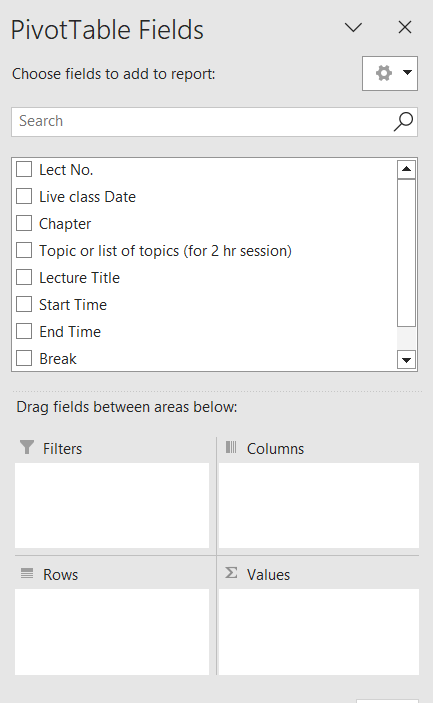

In [8]:
df_india.pivot_table(index='Country',  values='%Growth', aggfunc='mean').reset_index()

,Country,%Growth
0,India,0.027778


# Decision Trees

### import the key libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split #training and testing dataset split
from sklearn.preprocessing import StandardScaler #standardizing the data
from sklearn.tree import DecisionTreeClassifier

### Load the data

In [11]:
df_social = pd.read_csv('Social_Network_Ads.csv')

In [12]:
df_social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Exploratory Data Analysis

#### To check the missing data

In [13]:
df_social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### To get the info about the data

In [14]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Summary statistics 

In [15]:
df_social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### To show the correlation matrix

In [16]:
df_social.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


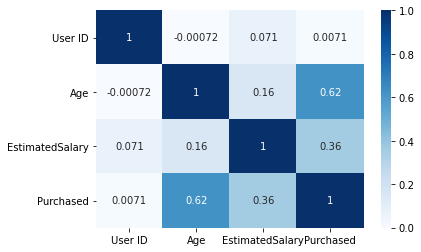

In [17]:
sns.heatmap(df_social.corr(), annot=True, cmap='Blues')
plt.show()

-- Key takeaway: Age seems to be `moderately` correlated with purchased

### Plot the distribution of Age
`hint: Histogram`

<AxesSubplot:xlabel='Age', ylabel='Count'>

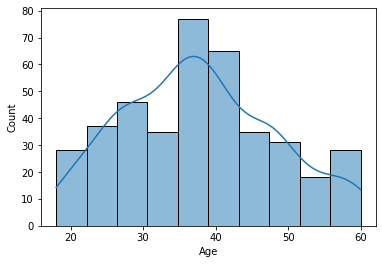

In [18]:
sns.histplot(df_social["Age"], kde=True)

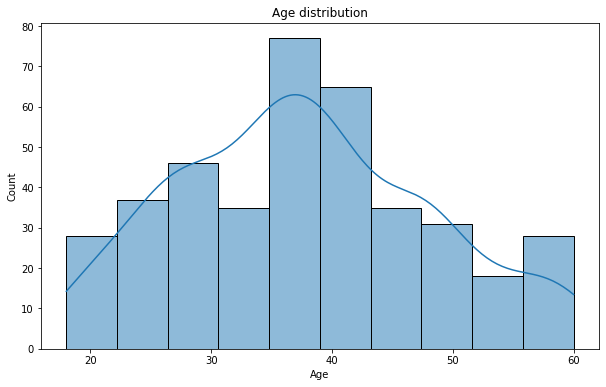

In [19]:
plt.subplots(figsize=(10,6))
sns.histplot(df_social['Age'], kde=True)
plt.title('Age distribution')
plt.show()

In [20]:
df_social['Age'].mean()

37.655

#### Add `mean` and `median` lines to the histogram

`axvline`

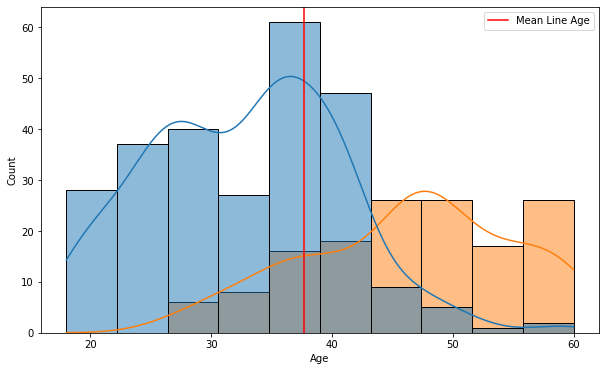

In [21]:
plt.subplots(figsize=(10,6))
sns.histplot(df_social, x='Age', hue='Purchased', kde=True)

plt.axvline(x = df_social['Age'].mean(), color = 'red', label = 'Mean Line Age') #mean line for age

plt.legend()
plt.show()

#### Create the groups of age using below logic

In [22]:
df_social['Age'].min()

18

In [23]:
df_social['Age'].max()

60

Age_Category: 15-20, 20-25,25-30,30-35,35-40,40-45, 45-50, 50-55, 55-60

#### To create a new column `Age_Category` basis age data

In [24]:
age_bins = [15,20,25,30,35,40,45,50,55,60]
labels = [f"{start} - {end}" for start, end in zip(age_bins[:-1],age_bins[1:])] #to create the bins

#### `pd.cut()`

In [25]:
df_social['Age_Category'] = pd.cut(df_social['Age'], bins=age_bins,labels=labels, right=False)

In [26]:
df_social.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_Category
396,15706071,Male,51,23000,1,50 - 55
226,15795224,Female,36,126000,1,35 - 40
258,15569641,Female,58,95000,1,55 - 60


In [27]:
age_bins[:-1] #except the last 

[15, 20, 25, 30, 35, 40, 45, 50, 55]

In [28]:
age_bins[1:]

[20, 25, 30, 35, 40, 45, 50, 55, 60]

In [29]:
df_social.groupby('Age_Category').agg(Total_Purchased_Count = ('Purchased', 'sum')).reset_index()

,Age_Category,Total_Purchased_Count
0,15 - 20,0
1,20 - 25,0
2,25 - 30,4
3,30 - 35,10
4,35 - 40,22
5,40 - 45,13
6,45 - 50,46
7,50 - 55,19
8,55 - 60,22


In [30]:
df_social.groupby([ 'Age_Category','Gender']).agg(Total_Purchased_Count = ('Purchased', 'sum')).reset_index()

,Age_Category,Gender,Total_Purchased_Count
0,15 - 20,Female,0
1,15 - 20,Male,0
2,20 - 25,Female,0
3,20 - 25,Male,0
4,25 - 30,Female,2
5,25 - 30,Male,2
6,30 - 35,Female,5
7,30 - 35,Male,5
8,35 - 40,Female,10
9,35 - 40,Male,12


### Split the dataset into training and testing set

In [31]:
df_social.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age_Category'],
      dtype='object')

In [32]:
X = df_social[[ 'Age', 'EstimatedSalary']] #features

In [33]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [34]:
y = df_social[['Purchased']] #target
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=25)

In [62]:
X_train
X_train_original = X_train.copy()

In [63]:
y_train

,Purchased
368,0
37,0
284,0
210,1
242,1
...,...
374,0
317,0
143,0
318,1


### Feature Scaling

--Note: Decision trees can handle categorical variables without the need for `one-hot encoding

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
X_train

array([[ 0.04326431,  0.01457333],
       [-0.71534282, -0.62665307],
       [ 0.99152323,  2.05483912],
       [ 0.99152323,  0.74323968],
       [ 1.18117501,  0.51006645],
       [-0.24121336,  0.59750641],
       [-1.75842763, -1.44275938],
       [-1.66360174, -1.00555957],
       [-0.52569104,  1.8799592 ],
       [ 1.3708268 , -0.94726626],
       [ 1.08634912,  0.5392131 ],
       [ 1.08634912, -0.1603066 ],
       [ 0.42256788, -0.18945325],
       [-0.9049946 ,  0.5392131 ],
       [-1.37912406, -1.2387328 ],
       [ 0.32774199, -0.33518652],
       [ 0.61221966, -0.91811961],
       [ 0.80187145, -1.2387328 ],
       [-0.24121336, -0.1603066 ],
       [ 0.42256788, -0.1603066 ],
       [-1.75842763,  0.1603066 ],
       [-0.14638747, -0.59750641],
       [ 1.3708268 , -1.44275938],
       [ 0.04326431,  0.01457333],
       [ 1.46565269,  2.11313243],
       [ 0.04326431, -0.56835976],
       [-0.81016871,  2.2588657 ],
       [ 2.03460804,  1.73422592],
       [-0.43086515,

In [66]:
X_train_df = pd.DataFrame(X_train, columns=['Age', 'Estimated Salary'])

In [67]:
X_train_df

,Age,Estimated Salary
0,0.043264,0.014573
1,-0.715343,-0.626653
2,0.991523,2.054839
3,0.991523,0.743240
4,1.181175,0.510066
...,...,...
315,-0.051562,0.276893
316,-0.241213,-0.451773
317,-0.715343,0.539213
318,0.707046,-1.122146


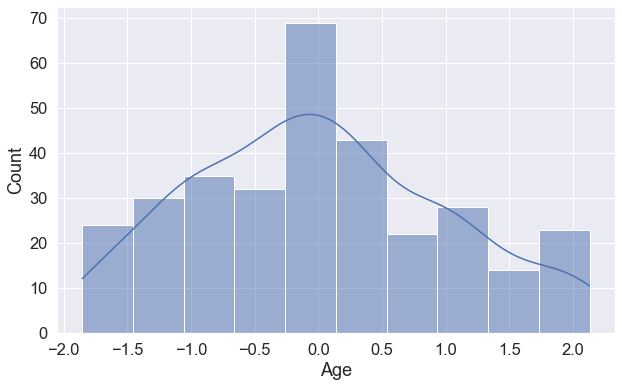

In [68]:
plt.subplots(figsize=(10,6))
sns.histplot(X_train_df['Age'], kde=True)
# plt.legend()
plt.show()

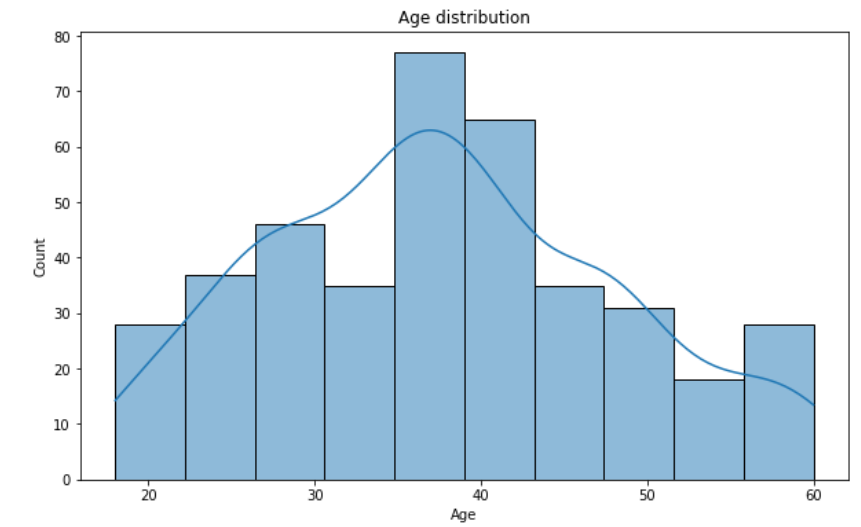

### Training the decision tree model

In [69]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=10, max_depth=2 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=10)

### Predicting a new result

In [70]:
pred_values = dt_model.predict(X_test)

### Plot the confusion matrix

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [72]:
cm = confusion_matrix(y_test, pred_values)

In [73]:
cm

array([[47,  6],
       [ 0, 27]], dtype=int64)

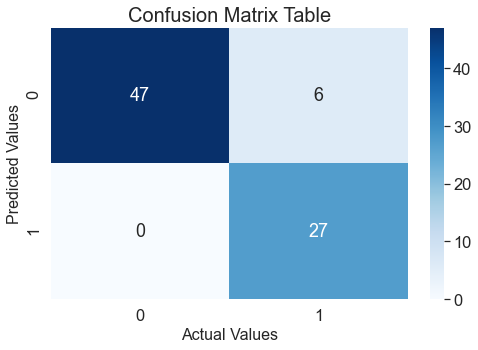

In [74]:
plt.subplots(figsize = (8,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Table", fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

In [75]:
63/80

0.7875

In [76]:
68/80

0.85

### H/W Calculate `avg accuracy` using `K-fold cross validation

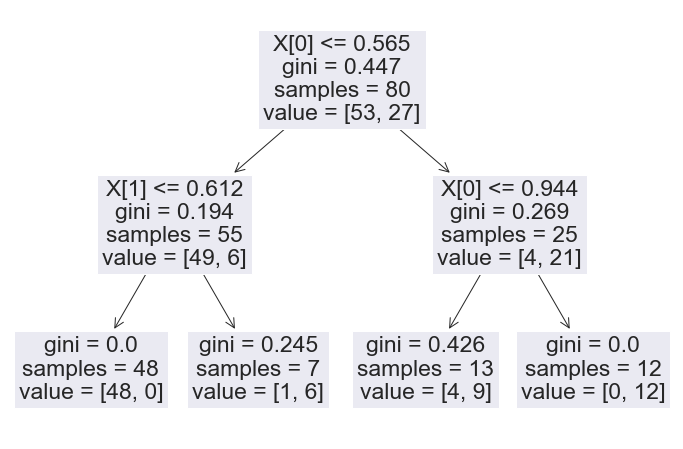

In [77]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt_model.fit(X_test,y_test))
plt.show()

In [78]:
from sklearn.tree import plot_tree

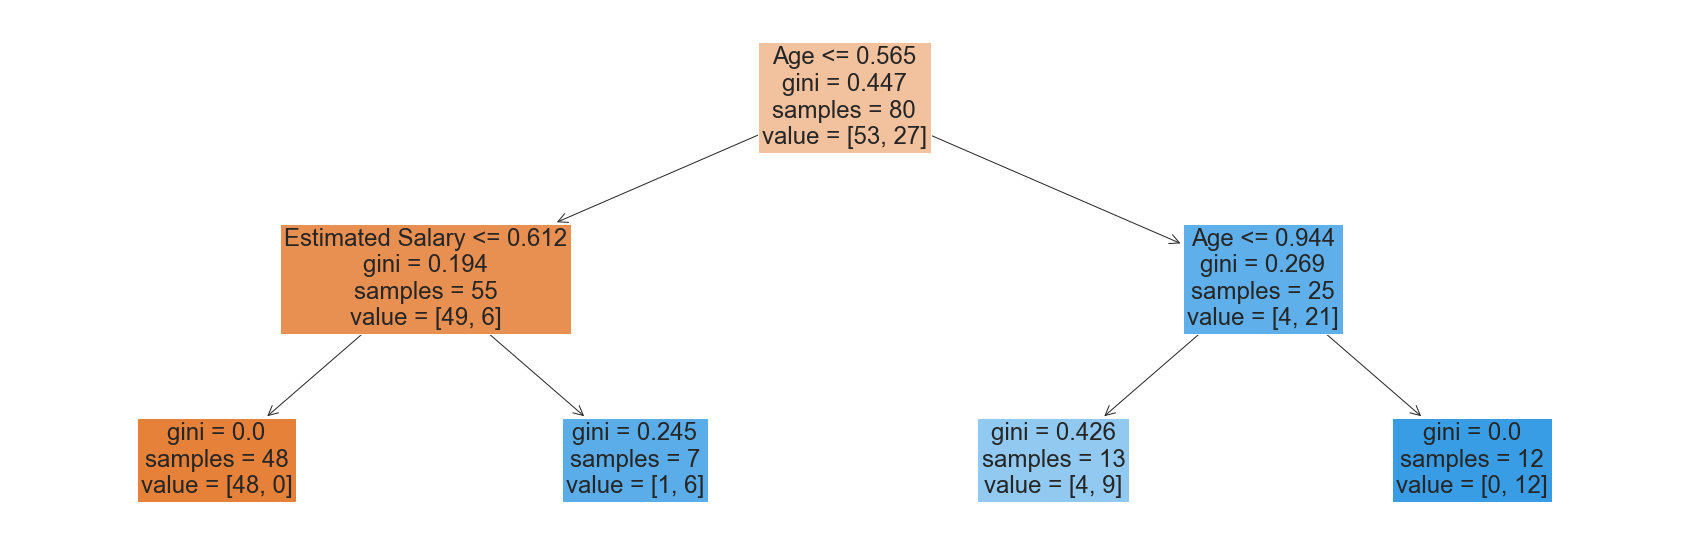

In [79]:
plt.figure(figsize=(30,10))

plot_tree(dt_model, feature_names=['Age', 'Estimated Salary'],
         impurity='False', filled='True', fontsize=24)
plt.show()

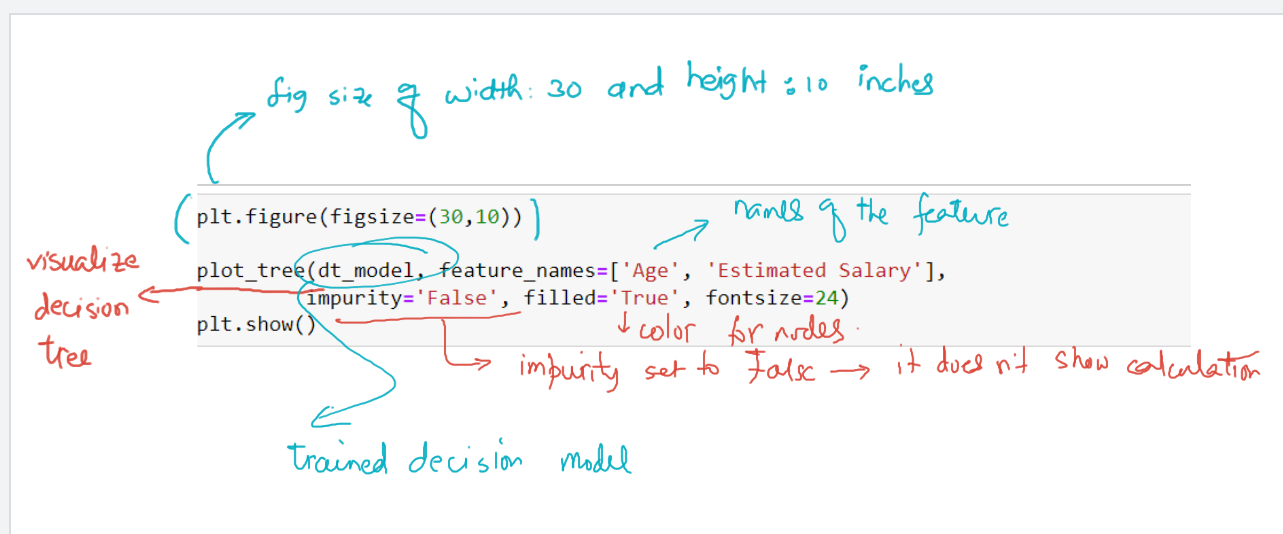

### Q. Map the original data to the dt_model 

In [80]:
X_train

array([[ 0.04326431,  0.01457333],
       [-0.71534282, -0.62665307],
       [ 0.99152323,  2.05483912],
       [ 0.99152323,  0.74323968],
       [ 1.18117501,  0.51006645],
       [-0.24121336,  0.59750641],
       [-1.75842763, -1.44275938],
       [-1.66360174, -1.00555957],
       [-0.52569104,  1.8799592 ],
       [ 1.3708268 , -0.94726626],
       [ 1.08634912,  0.5392131 ],
       [ 1.08634912, -0.1603066 ],
       [ 0.42256788, -0.18945325],
       [-0.9049946 ,  0.5392131 ],
       [-1.37912406, -1.2387328 ],
       [ 0.32774199, -0.33518652],
       [ 0.61221966, -0.91811961],
       [ 0.80187145, -1.2387328 ],
       [-0.24121336, -0.1603066 ],
       [ 0.42256788, -0.1603066 ],
       [-1.75842763,  0.1603066 ],
       [-0.14638747, -0.59750641],
       [ 1.3708268 , -1.44275938],
       [ 0.04326431,  0.01457333],
       [ 1.46565269,  2.11313243],
       [ 0.04326431, -0.56835976],
       [-0.81016871,  2.2588657 ],
       [ 2.03460804,  1.73422592],
       [-0.43086515,

In [81]:
X_train_original

,Age,EstimatedSalary
368,38,71000
37,30,49000
284,48,141000
210,48,96000
242,50,88000
...,...,...
374,37,80000
317,35,55000
143,30,89000
318,45,32000
